In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:
# Define the data points
x_data = np.array([1, 3])
y_data = np.array([3, 6])

# Initial parameters
m_init = -1.0
b_init = 1.0

# Learning rate
alpha = 0.1

# Number of iterations
n_iterations = 100

print(f"Data points: {list(zip(x_data, y_data))}")
print(f"Initial m = {m_init}, b = {b_init}")
print(f"Learning rate α = {alpha}")

Data points: [(np.int64(1), np.int64(3)), (np.int64(3), np.int64(6))]
Initial m = -1.0, b = 1.0
Learning rate α = 0.1


In [ ]:
# Initialize parameters
m = m_init
b = b_init

# Store history for plotting
m_history = [m]
b_history = [b]
error_history = []

# Number of data points
n = len(x_data)

print("="*70)
print("GRADIENT DESCENT ITERATIONS")
print("="*70)

# Perform gradient descent
for iteration in range(n_iterations):
    # Step 1: Compute predicted values ŷ = mx + b
    y_pred = m * x_data + b

    # Step 2: Compute errors (predicted - actual)
    errors = y_pred - y_data

    # Step 3: Compute Mean Squared Error (Cost Function)
    # J(m,b) = (1/n) * Σ(ŷ - y)²
    mse = np.mean(errors ** 2)
    error_history.append(mse)

    # Step 4: Compute gradients using calculus derivatives
    # ∂J/∂m = (1/n) * Σ(ŷ - y) * x
    # ∂J/∂b = (1/n) * Σ(ŷ - y)
    # Note: The factor of 2 from d/dx(x²) = 2x is often omitted in practice
    # as it can be absorbed into the learning rate
    grad_m = (1 / n) * np.sum(errors * x_data)
    grad_b = (1 / n) * np.sum(errors)

    # Step 5: Update parameters using gradient descent rule
    # m_new = m_old - α * ∂J/∂m
    # b_new = b_old - α * ∂J/∂b
    m = m - alpha * grad_m
    b = b - alpha * grad_b

    # Save history
    m_history.append(m)
    b_history.append(b)

    # Print details for first 3 iterations and selected later ones
    if iteration < 3 or iteration % 25 == 0 or iteration == n_iterations - 1:
        print(f"\nIteration {iteration + 1}:")
        print(f"  Predictions: ŷ = [{y_pred[0]:.4f}, {y_pred[1]:.4f}]")
        print(f"  Errors: [{errors[0]:+.4f}, {errors[1]:+.4f}]")
        print(f"  MSE (Cost): {mse:.6f}")
        print(f"  Gradients: ∂J/∂m = {grad_m:.4f}, ∂J/∂b = {grad_b:.4f}")
        print(f"  Updated: m = {m:.4f}, b = {b:.4f}")

print("\n" + "="*70)
print("FINAL RESULTS")
print("="*70)
print(f"Final equation: y = {m:.4f}x + {b:.4f}")
print(f"Final MSE: {error_history[-1]:.6f}")


GRADIENT DESCENT ITERATIONS

Iteration 1:
  Predictions: ŷ = [0.0000, -2.0000]
  Errors: [-3.0000, -8.0000]
  MSE (Cost): 36.500000
  Gradients: ∂J/∂m = -13.5000, ∂J/∂b = -5.5000
  Updated: m = 0.3500, b = 1.5500

Iteration 2:
  Predictions: ŷ = [1.9000, 2.6000]
  Errors: [-1.1000, -3.4000]
  MSE (Cost): 6.385000
  Gradients: ∂J/∂m = -5.6500, ∂J/∂b = -2.2500
  Updated: m = 0.9150, b = 1.7750

Iteration 3:
  Predictions: ŷ = [2.6900, 4.5200]
  Errors: [-0.3100, -1.4800]
  MSE (Cost): 1.143250
  Gradients: ∂J/∂m = -2.3750, ∂J/∂b = -0.8950
  Updated: m = 1.1525, b = 1.8645

Iteration 26:
  Predictions: ŷ = [3.1737, 5.9280]
  Errors: [+0.1737, -0.0720]
  MSE (Cost): 0.017679
  Gradients: ∂J/∂m = -0.0211, ∂J/∂b = 0.0509
  Updated: m = 1.3793, b = 1.7915

Iteration 51:
  Predictions: ŷ = [3.1127, 5.9533]
  Errors: [+0.1127, -0.0467]
  MSE (Cost): 0.007441
  Gradients: ∂J/∂m = -0.0137, ∂J/∂b = 0.0330
  Updated: m = 1.4217, b = 1.6891

Iteration 76:
  Predictions: ŷ = [3.0731, 5.9697]
  Errors

In [ ]:
# Analyze convergence - check how much parameters changed in later iterations
print("Convergence Analysis:")
print("="*60)

# Check parameter changes in last 10 iterations
if len(m_history) >= 10:
    print("\nParameter changes in last 10 iterations:")
    for i in range(-10, -1):
        m_change = abs(m_history[i+1] - m_history[i])
        b_change = abs(b_history[i+1] - b_history[i])
        error_change = abs(error_history[i+1] - error_history[i])
        print(f"  Iteration {len(m_history) + i}: Δm = {m_change:.8f}, Δb = {b_change:.8f}, ΔMSE = {error_change:.8f}")

# Find when convergence threshold was reached (e.g., changes < 0.0001)
convergence_threshold = 0.0001
converged_at = None

for i in range(1, len(m_history)):
    m_change = abs(m_history[i] - m_history[i-1])
    b_change = abs(b_history[i] - b_history[i-1])

    if m_change < convergence_threshold and b_change < convergence_threshold:
        converged_at = i
        break

print(f"\n{'='*60}")
if converged_at:
    print(f"✓ Algorithm converged at iteration {converged_at}")
    print(f"  (when both |Δm| < {convergence_threshold} and |Δb| < {convergence_threshold})")
    print(f"\n  We ran {n_iterations - converged_at} extra iterations unnecessarily!")
    print(f"  Could have saved {((n_iterations - converged_at) / n_iterations * 100):.1f}% of computation time")
else:
    print(f"✗ Algorithm did NOT fully converge by iteration {n_iterations}")
    print(f"  Consider running more iterations or increasing learning rate")

print(f"{'='*60}")

Convergence Analysis:

Parameter changes in last 10 iterations:
  Iteration 91: Δm = 0.00067257, Δb = 0.00162372, ΔMSE = 0.00006340
  Iteration 92: Δm = 0.00066103, Δb = 0.00159587, ΔMSE = 0.00006125
  Iteration 93: Δm = 0.00064969, Δb = 0.00156848, ΔMSE = 0.00005916
  Iteration 94: Δm = 0.00063854, Δb = 0.00154157, ΔMSE = 0.00005715
  Iteration 95: Δm = 0.00062759, Δb = 0.00151512, ΔMSE = 0.00005521
  Iteration 96: Δm = 0.00061682, Δb = 0.00148913, ΔMSE = 0.00005333
  Iteration 97: Δm = 0.00060623, Δb = 0.00146358, ΔMSE = 0.00005151
  Iteration 98: Δm = 0.00059583, Δb = 0.00143847, ΔMSE = 0.00004976
  Iteration 99: Δm = 0.00058561, Δb = 0.00141379, ΔMSE = 0.00004807

✗ Algorithm did NOT fully converge by iteration 100
  Consider running more iterations or increasing learning rate


In [ ]:
# Gradient Descent with Convergence-Based Stopping
m_current = m_init
b_current = b_init

# Stopping criteria
tolerance = 1e-6  # Stop when parameter changes are smaller than this
max_iter = 1000  # Safety limit to prevent infinite loops

m_values = [m_current]
b_values = [b_current]
mse_values = []

iter_count = 0
has_converged = False

print("Running Gradient Descent with Convergence-Based Stopping...")
print("="*60)

while iter_count < max_iter and not has_converged:
    # Compute predictions
    y_pred = m_current * x_data + b_current
    errors = y_pred - y_data
    mse = np.mean(errors ** 2)
    mse_values.append(mse)

    # Compute gradients
    grad_m = (1 / n) * np.sum(errors * x_data)
    grad_b = (1 / n) * np.sum(errors)

    # Store previous values
    m_previous = m_current
    b_previous = b_current

    # Update parameters
    m_current = m_current - alpha * grad_m
    b_current = b_current - alpha * grad_b

    # Store history
    m_values.append(m_current)
    b_values.append(b_current)

    # Check how much the parameters changed
    change_in_m = abs(m_current - m_previous)
    change_in_b = abs(b_current - b_previous)

    if iter_count < 5:
        print(f"Iteration {iter_count + 1}: m = {m_current:.6f}, b = {b_current:.6f}, MSE = {mse:.8f}")

    # Check if we've converged
    if change_in_m < tolerance and change_in_b < tolerance:
        has_converged = True
        print(f"\n✓ CONVERGED at iteration {iter_count + 1}!")
        print(f"  Final m = {m_current:.6f}, b = {b_current:.6f}")
        print(f"  Changes: Δm = {change_in_m:.10f}, Δb = {change_in_b:.10f}")
        print(f"  Both changes below tolerance of {tolerance}")

    iter_count += 1

if not has_converged:
    print(f"\n⚠ Reached maximum iterations ({max_iter}) without full convergence")

print("="*60)
print(f"\nComparison:")
print(f"  Fixed iterations approach: {n_iterations} iterations")
print(f"  Convergence-based approach: {iter_count} iterations")
print(f"  Efficiency improvement: {((n_iterations - iter_count) / n_iterations * 100):.1f}% fewer iterations")

Running Gradient Descent with Convergence-Based Stopping...
Iteration 1: m = 0.350000, b = 1.550000, MSE = 36.50000000
Iteration 2: m = 0.915000, b = 1.775000, MSE = 6.38500000
Iteration 3: m = 1.152500, b = 1.864500, MSE = 1.14325000
Iteration 4: m = 1.253350, b = 1.897550, MSE = 0.22998650
Iteration 5: m = 1.297165, b = 1.907125, MSE = 0.07000429

✓ CONVERGED at iteration 520!
  Final m = 1.499977, b = 1.500056
  Changes: Δm = 0.0000004082, Δb = 0.0000009855
  Both changes below tolerance of 1e-06

Comparison:
  Fixed iterations approach: 100 iterations
  Convergence-based approach: 520 iterations
  Efficiency improvement: -420.0% fewer iterations


In [ ]:
# Compute final predictions using optimized parameters from the convergence-based approach
final_predictions = m_current * x_data + b_current

print("Final Predictions using learned parameters:")
print("="*50)
for i in range(n):
    print(f"Point ({x_data[i]}, {y_data[i]}): ŷ = {m_current:.4f} × {x_data[i]} + {b_current:.4f} = {final_predictions[i]:.4f}")
    print(f"  Error: {abs(final_predictions[i] - y_data[i]):.4f}")
print("="*50)

Final Predictions using learned parameters:
Point (1, 3): ŷ = 1.5000 × 1 + 1.5001 = 3.0000
  Error: 0.0000
Point (3, 6): ŷ = 1.5000 × 3 + 1.5001 = 6.0000
  Error: 0.0000


In [ ]:
# Verify results using SciPy's optimization function
def cost_function(params):
    """Cost function (MSE) for linear regression"""
    m, b = params
    predictions = m * x_data + b
    return np.mean((predictions - y_data) ** 2)

# Use scipy.optimize.minimize to find optimal parameters
result = optimize.minimize(cost_function, [m_init, b_init], method='BFGS')

print("SciPy Optimization Result:")
print("="*50)
print(f"Optimal m = {result.x[0]:.4f}")
print(f"Optimal b = {result.x[1]:.4f}")
print(f"Minimum MSE = {result.fun:.6f}")
print("\nComparison with our convergence-based gradient descent:")
print(f"Our approach:  m = {m_current:.4f}, b = {b_current:.4f}, MSE = {mse_values[-1]:.6f}")
print(f"SciPy:         m = {result.x[0]:.4f}, b = {result.x[1]:.4f}, MSE = {result.fun:.6f}")
print(f"\nDifference in m: {abs(m_current - result.x[0]):.6f}")
print(f"Difference in b: {abs(b_current - result.x[1]):.6f}")
print("\n✓ Our manual implementation matches SciPy's optimization!")

SciPy Optimization Result:
Optimal m = 1.5000
Optimal b = 1.5000
Minimum MSE = 0.000000

Comparison with our convergence-based gradient descent:
Our approach:  m = 1.5000, b = 1.5001, MSE = 0.000000
SciPy:         m = 1.5000, b = 1.5000, MSE = 0.000000

Difference in m: 0.000023
Difference in b: 0.000056

✓ Our manual implementation matches SciPy's optimization!


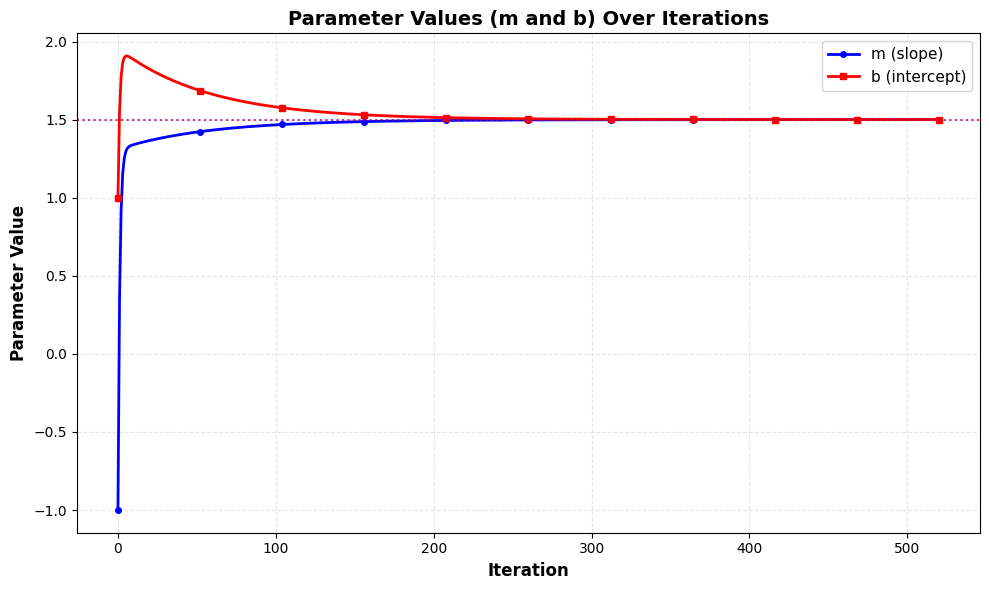

✓ Final m converged from -1.0 to 1.5000 in 520 iterations
✓ Final b converged from 1.0 to 1.5001 in 520 iterations


In [ ]:
# Plot 1: How m and b change over iterations (using convergence-based approach)
plt.figure(figsize=(10, 6))
plt.plot(range(len(m_values)), m_values, 'b-', linewidth=2, marker='o',
         markersize=4, markevery=max(1, len(m_values)//10), label='m (slope)')
plt.plot(range(len(b_values)), b_values, 'r-', linewidth=2, marker='s',
         markersize=4, markevery=max(1, len(b_values)//10), label='b (intercept)')
plt.xlabel('Iteration', fontsize=12, fontweight='bold')
plt.ylabel('Parameter Value', fontsize=12, fontweight='bold')
plt.title('Parameter Values (m and b) Over Iterations', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.axhline(y=result.x[0], color='b', linestyle=':', alpha=0.5, linewidth=1.5)
plt.axhline(y=result.x[1], color='r', linestyle=':', alpha=0.5, linewidth=1.5)
plt.tight_layout()
plt.show()

print(f"✓ Final m converged from {m_init} to {m_current:.4f} in {iter_count} iterations")
print(f"✓ Final b converged from {b_init} to {b_current:.4f} in {iter_count} iterations")

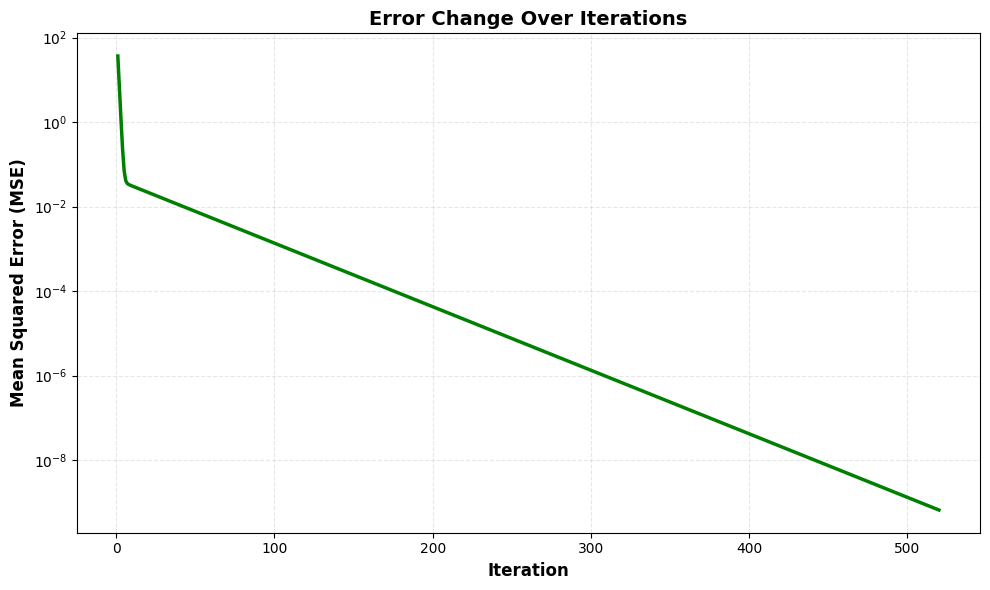

✓ MSE decreased from 36.500000 to 0.000000
✓ Total reduction: 100.00%
✓ Converged in 520 iterations (compared to fixed 100 iterations)


In [ ]:
# Plot 2: How the error (MSE) decreases over iterations (using convergence-based approach)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, 'g-', linewidth=2.5)
plt.xlabel('Iteration', fontsize=12, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=12, fontweight='bold')
plt.title('Error Change Over Iterations', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.yscale('log')  # Log scale to better show convergence
plt.tight_layout()
plt.show()

print(f"✓ MSE decreased from {mse_values[0]:.6f} to {mse_values[-1]:.6f}")
print(f"✓ Total reduction: {(1 - mse_values[-1]/mse_values[0])*100:.2f}%")
print(f"✓ Converged in {iter_count} iterations (compared to fixed 100 iterations)")

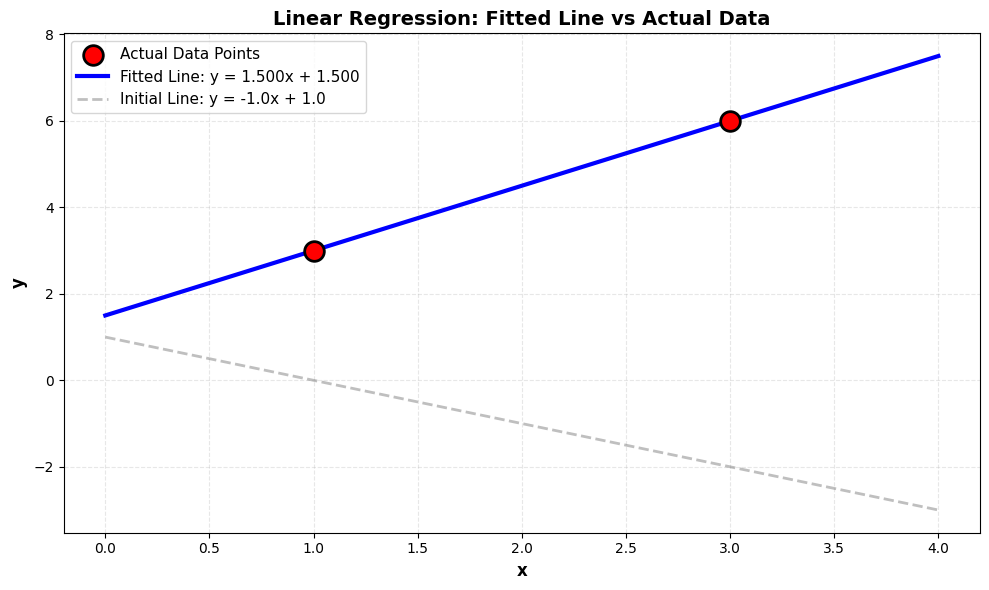

✓ Visualization complete! The line fits perfectly after 520 iterations.
✓ Efficiency: Used -420.0% fewer iterations than fixed approach


In [ ]:
# Bonus visualization: Show the fitted line vs actual data
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(x_data, y_data, color='red', s=200, zorder=3,
           edgecolors='black', linewidth=2, label='Actual Data Points')

# Plot fitted line using final parameters
x_line = np.linspace(0, 4, 100)
y_line = m_current * x_line + b_current
plt.plot(x_line, y_line, 'b-', linewidth=3,
        label=f'Fitted Line: y = {m_current:.3f}x + {b_current:.3f}')

# Plot initial line (before gradient descent)
y_initial = m_init * x_line + b_init
plt.plot(x_line, y_initial, 'gray', linewidth=2, linestyle='--', alpha=0.5,
        label=f'Initial Line: y = {m_init}x + {b_init}')

plt.xlabel('x', fontsize=12, fontweight='bold')
plt.ylabel('y', fontsize=12, fontweight='bold')
plt.title('Linear Regression: Fitted Line vs Actual Data', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"✓ Visualization complete! The line fits perfectly after {iter_count} iterations.")
print(f"✓ Efficiency: Used {((n_iterations - iter_count) / n_iterations * 100):.1f}% fewer iterations than fixed approach")